## Residual conditional variational autoencoder for radio galaxy generation

In [1]:
# Display the result
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
from rescvae.rescvae import rescvae
from rescvae.utils import utils

In [4]:
from rescvae.configs import config_rg
from rescvae.configs import config_train_rg

### Construct the network

In [5]:
cf = config_rg()
tr_cf = config_train_rg()

In [6]:
net = rescvae(cf)
net.cvae_build()
net.net_print()

(?, 20, 20, 16)
(?, 10, 10, 32)
(?, 5, 5, 64)
(?, 10, 10, 32)
(?, 20, 20, 16)
(?, 40, 40, 1)
Layer ID    Layer type    Layer shape
0 Input layer [None, 40, 40, 3]
1 Block_en_0 [None, 40, 40, 3]
2 Block_en_1 [None, 20, 20, 16]
3 Block_en_2 [None, 10, 10, 32]
4 En_flatten [None, 1600]
5 En_mu [None, 32]
6 En_sigma [None, 32]
7 z [None, 32]
8 De_flatten [None, 1600]
9 De_flatten_to_conv [None, 5, 5, 64]
10 Block_de_0 [None, 10, 10, 32]
11 Block_de_1 [None, 20, 20, 16]
12 Block_de_2 [None, 40, 40, 1]
13 Output layer [None, 40, 40, 1]
14 Flatten [None, 40, 40, 1]


### Load data

In [7]:
# load training images
import pickle
import time
import numpy as np
x_raw = []
y_raw = []
num_grp = 2
for i in range(num_grp):
    fname = 'data/sample-lrg-train-40-40-c3-gr{0}.pkl'.format(i)
    with open(fname, 'rb') as fp:
        datadict = pickle.load(fp)
        x_raw.append(datadict['data'])
        y_raw.append(datadict['label'])
        time.sleep(3)

# Combine and normalization
x_data = np.vstack(x_raw).astype('float32')
y_label = np.hstack(y_raw)

del(x_raw)
    
# vec2onehot
y_label = utils.vec2onehot(label=y_label, numclass=cf.numclass)

### Train the network

In [8]:
# train the net
net.cvae_train(data=x_data, labels=y_label, train_configs=tr_cf)

[2018-11-27: 19:07:30]: Epochs    Trn_loss_recon    Val_loss_recon    Trn_loss_latent    Val_loss_latent
[2018-11-27: 19:07:51]:      0        1169.92812        1056.25975           20.06613            4.34570
[2018-11-27: 19:08:11]:      1        1047.46098        1001.46108            4.90570            3.79250
[2018-11-27: 19:08:30]:      2         992.31958         946.97076            1.11439            3.06841
[2018-11-27: 19:08:49]:      3         941.07722         896.31264            0.54248            2.72441
[2018-11-27: 19:09:08]:      4         894.52205         854.13485            0.44906            2.55123
[2018-11-27: 19:09:28]:      5         854.44436         820.80061            0.35723            2.42848
[2018-11-27: 19:09:47]:      6         820.72681         794.50715            0.33221            2.27035
[2018-11-27: 19:10:06]:      7         792.48006         772.45845            0.37722            2.24655
[2018-11-27: 19:10:26]:      8         768.29036       

[2018-11-27: 19:32:14]:     78         215.95019         216.87629            6.91252            6.66605
[2018-11-27: 19:32:33]:     79         213.21126         213.53749            6.91352            6.87690
[2018-11-27: 19:32:51]:     80         210.60203         211.25891            6.94917            6.96472
[2018-11-27: 19:33:10]:     81         207.97793         209.14702            6.99310            7.00064
[2018-11-27: 19:33:28]:     82         205.51226         207.47328            7.02648            6.96591
[2018-11-27: 19:33:47]:     83         203.08756         203.65190            7.02902            7.11413
[2018-11-27: 19:34:06]:     84         200.71069         201.09048            7.05076            6.91928
[2018-11-27: 19:34:24]:     85         198.41358         199.37341            7.09486            7.08321
[2018-11-27: 19:34:43]:     86         196.14115         197.10957            7.12760            7.02615
[2018-11-27: 19:35:01]:     87         193.97684       

[2018-11-27: 19:57:21]:    157         126.38386         131.57683            8.56307            8.84095
[2018-11-27: 19:57:40]:    158         126.03610         131.72581            8.60884            8.52384
[2018-11-27: 19:58:00]:    159         125.75574         129.83181            8.57530            8.27612
[2018-11-27: 19:58:20]:    160         125.42804         130.06734            8.59043            8.82916
[2018-11-27: 19:58:41]:    161         125.16010         130.68937            8.63114            8.78236
[2018-11-27: 19:59:01]:    162         124.86257         131.25279            8.65288            8.70528
[2018-11-27: 19:59:21]:    163         124.58541         131.00319            8.66371            8.65902
[2018-11-27: 19:59:42]:    164         124.33237         129.80737            8.65926            9.01211
[2018-11-27: 20:00:02]:    165         124.04877         129.23977            8.67093            8.72861
[2018-11-27: 20:00:23]:    166         123.80191       

In [9]:
# save net
import os
foldname = "rescvae_rg"
name = "rescvae.pkl"
netname = "model_rescvae.ckpt"
namepath = os.path.join(foldname, name)
netpath = os.path.join(foldname, netname)
savedict = {'netpath': netpath}
if os.path.exists(foldname):
    os.system("rm -r %s" % (foldname))
os.mkdir(foldname)
utils.save_net(
    sess=net.sess,
    namepath=namepath,
    netpath=netpath,
    savedict=savedict)

savepath = os.path.join(foldname,'train_loss_{0}.pkl'.format(cf.z_length))
utils.loss_save(net, savepath)

### Test

In [11]:
n_examples = 10
fname = 'data/sample-lrg-test-40-40-c3.pkl'
with open(fname, 'rb') as fp:
    datadict = pickle.load(fp)
    x_test = datadict['data']
    y_test = datadict['label']

y_test = utils.vec2onehot(y_test, 2)

In [12]:
idx_test = np.random.permutation(len(y_test))
img_test = x_test[idx_test[0:n_examples]]
label_test = y_test[idx_test[0:n_examples]]
label_test_input = utils.condition_reshape(
    label=label_test, numclass=cf.numclass, imgshape=(cf.rs, cf.rs))

In [13]:
img_est = net.sess.run(
    net.output_flatten_de, 
    feed_dict={net.inputs: img_test.reshape(-1,cf.rs,cf.rs,1), 
               net.outputs: img_test.reshape(-1,cf.rs,cf.rs,1),
               net.conditions: label_test,
               net.conditions_input: label_test_input,
               net.is_training: False,
               net.keep_prob:1.0
               })

/home/mzx/.local/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


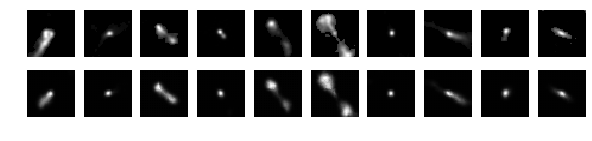

In [14]:
import numpy as np
fig, axs = plt.subplots(2, n_examples, figsize=(n_examples, 2))
for example_i in range(n_examples):
    # original
    axs[0][example_i].imshow(np.reshape(img_test[example_i, :], (cf.rs, cf.rs)), cmap='gray')
    axs[0][example_i].axis('off')
    # reconstructed
    axs[1][example_i].imshow(np.reshape(img_est[example_i, :], (cf.rs, cf.rs)), cmap='gray')
    axs[1][example_i].axis('off')

fig.show()
plt.draw()

## Generate new images

/home/mzx/.local/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


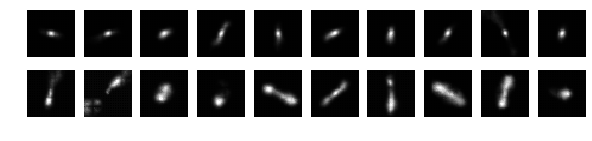

In [25]:
n_examples = 10

fig, axs = plt.subplots(cf.numclass, n_examples, figsize=(n_examples, cf.numclass))
for i in range(cf.numclass):
    z_gen = np.random.normal(0, 1, [n_examples, cf.z_length])
    # label
    labels = np.zeros([n_examples, cf.numclass])
    labels[:,i] = 1.0
    imgs = net.sess.run(
        net.output_flatten_de, 
        feed_dict = {net.z: z_gen, net.conditions: labels, 
                     net.is_training: False, 
                     net.keep_prob: 1.0})
    img_test = [np.reshape(imgs[i], [cf.rs, cf.rs]) for i in range(len(imgs))]
    for example_i in range(n_examples):
        # original
        axs[i][example_i].imshow(img_test[example_i], cmap='gray')
        axs[i][example_i].axis('off')

fig.show()
plt.draw()
plt.savefig("rg-generation.png", bbox_inches="tight", dpi=200)